In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [95]:
class Ising:

    def __init__(self, L, T):

        self.L = L
        self.T = T
        self.E = 0
        w = {}
        
        for i in range(L):
            for j in range(L):
                for k in range(L):
                    w[i,j,k] = 0

        self.x = w
        
    def SetGS(self):

        for i in range(self.L):
            for j in range(self.L):
                for k in range(self.L):
                    self.x[i,j,k] = 1

        self.E = 0
        
        
    def SetNull(self):

        for i in range(self.L):
            for j in range(self.L):
                for k in range(self.L):
                    self.x[i,j,k] = 0

        self.E = 0
    
    def Random(self):
        for i in range(self.L):
            for j in range(self.L):
                for k in range(self.L):
                    a = np.random.rand()
                    if a > 0.5:
                        self.x[i,j,k] = 1
                    else:
                        self.x[i,j,k] = -1

    def positions(self, i, j, k, pos):

        max = self.L-1

        if pos == 0: #pos up
            if i == max:
                return (0,j,k)
            else:
                return (i+1,j,k)

        elif pos == 1: #pos down
            if i == 0:
                return (max,j,k)
            else:
                return (i-1,j,k)

        elif pos == 2: #pos right
            if k == max:
                return (i,j,0)
            else:
                return (i,j,k+1)

        elif pos == 3: #pos left
            if k == 0:
                return (i,j,max)
            else:
                return (i,j,k-1)

        elif pos == 4: #pos front
            if j == max:
                return (i,0,k)
            else:
                return (i,j+1,k)

        elif pos == 5: #pos behind
            if j == 0:
                return (i,max,k)
            else:
                return (i,j-1,k)
            
                            
    def AdjustEnergy(self):
        self.E = 0
        for i in range(self.L):
            for j in range(self.L):
                for k in range(self.L):
                    for n in range(6):
                        self.E -= \
                        self.x[i, j, k]*self.x[self.positions(i, j, k, n)]
        self.E = self.E/2

    def delta_E(self, i, j, k):

        counter = 0    
        dE = 0

        for pos in range(0,6):
            counter += self.x[self.positions(i, j, k, pos)]
        
        dE = 2*counter*self.x[i,j,k]

        return dE

    def Metropolis(self):

        a, b, c = np.random.randint(0, self.L, 3)

        dE = self.delta_E( a, b, c)
        A = np.exp(-dE/self.T)
        t = np.random.rand()

        if t < A:
            self.x[ a, b, c] *= -1
            self.E += dE

    def Magnetization(self):

        m = 0

        for i in range(self.L):
            for j in range(self.L):
                for k in range(self.L):
                    m += self.x[i, j, k]

        return abs(m/(self.L*self.L*self.L))
    
    def Wolff(self):
        # I pick a random point in the lattice
        a, b, c = np.random.randint(0, self.L, 3)
        # I build a lattice to store the positions of the spins I will change
        Temp = Ising(self.L, self.T)
        p = 1-np.exp(-2/Lat.T) 
        Temp.SetNull()
        Temp.x[a, b, c]  = 1
        t0 = []
        counter = 0
        
        # First step of the Wolff algortihm
        for i in range(6):
            if self.x[self.positions(a, b, c, i)] == self.x[a, b, c]:
                r = np.random.rand()
                if p > r:
                    Temp.x[self.positions(a, b, c, i)] = 1
                    counter += 1
                    # Vector containing cluster points earned in the first step
                    t0.append(self.positions(a, b, c, i))

        Check = False
        
        # Every other step of the algorithm is made in this cycle
        while Check == False and counter != 0:
            count = 0
            tp = []
            for i in range(len(t0)):
                for k in range(6):
                    if self.x[self.positions(t0[i][0], t0[i][1], t0[i][2], k)] == self.x[t0[i][0], t0[i][1], t0[i][2]]:
                        if Temp.x[self.positions(t0[i][0], t0[i][1], t0[i][2], k)] != 1:
                            r = np.random.rand()
                            if p > r:
                                count += 1
                                Temp.x[self.positions(t0[i][0], t0[i][1], t0[i][2], k)] = 1
                                tp.append(self.positions(t0[i][0], t0[i][1], t0[i][2], k))
            t0 = tp
            if count == 0:
                Check = True
        
        # I change every spin in the cluster identified
        # The cluster is identified by the matrix Temp
        for i in range(self.L):
                for j in range(self.L):
                    for k in range(self.L):
                        if Temp.x[i, j, k] == 1:
                            self.x[i, j, k] = -1*self.x[i, j, k]

For a 10x10x10 lattice this code runs in about 175 seconds
Time:  175.8522954


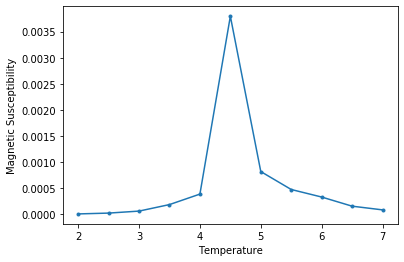

In [97]:
import timeit
start = timeit.default_timer()

print("For a 10x10x10 lattice this code runs in about 175 seconds")

# I set length and temperature of the Lattice
l = 10
T = 1
Lat = Ising(l, T)
# I prepare a vector to store the suscetibilities for different T's
X = []
#I prepare a variable that has the size of the lattice
s = pow(l,3)
# I prepare a vector that stores the temperatures that I want to explore
w = np.linspace(2,7,11)

for n in range(len(w)):
    # I start with a purely random configuration of the lattice
    Lat.Random()
    Lat.T = w[n]
    # I prepare two vectors to store the magnetizations (to the first and second powers)
    m = []
    m_2 = []
    # I perform the Wolff algortihm as many times as the size of the lattice
    for k in range(s):
        Lat.Wolff()
    # I perform the Wolff algortihm another 200 times and "make a measurement" every two iterations
    for j in range(200):
        if j%2 == 0:
            Lat.Wolff()
            m.append(Lat.Magnetization())
            m_2.append(pow(Lat.Magnetization(),2))
    # I average the measurements made and append them to a vector X
    a = sum(m)/len(m)
    b = sum(m_2)/len(m_2)
    X.append((1/Lat.T)*(b-pow(a,2)))

# I plot my results
plt.plot(w,X,'.-')
plt.ylabel("Magnetic Susceptibility")
plt.xlabel("Temperature")

stop = timeit.default_timer()

print('Time: ', stop - start) 